In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [2]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

Read data from the archive: (but only the first couple of years for the sake of the aforementioned slowness)

['BET', 'NET', 'DDT', 'CDT', 'C3', 'C4']
/glade/scratch/rfisher/archive/fates_pftboundaries1/lnd/hist/fates_pftboundaries1.clm2.h0.0009-06.nc
/glade/scratch/rfisher/archive/fates_pftboundaries2/lnd/hist/fates_pftboundaries2.clm2.h0.0009-06.nc
/glade/scratch/rfisher/archive/fates_pftboundaries3/lnd/hist/fates_pftboundaries3.clm2.h0.0009-06.nc
/glade/scratch/rfisher/archive/fates_pftboundaries4/lnd/hist/fates_pftboundaries4.clm2.h0.0009-06.nc
/glade/scratch/rfisher/archive/fates_pftboundaries5/lnd/hist/fates_pftboundaries5.clm2.h0.0009-06.nc
/glade/scratch/rfisher/archive/fates_pftboundaries6/lnd/hist/fates_pftboundaries6.clm2.h0.0009-06.nc


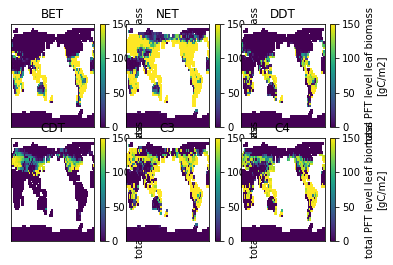

In [3]:
pftnames=['BET','NET','DDT','CDT','C3','C4']
print(pftnames)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]
#fig.suptitle('LAI', fontsize=16)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

scratch = '/glade/scratch/rfisher/'

yr='.clm2.h0.0009-06.nc'
runname='fates_pftboundaries'
pfts=range(1,7)
for pft1 in pfts:
   ax = fig.add_subplot(2, 3, pft1)     
   run=runname+str(pft1)
   arc = scratch + 'archive/' + run + '/lnd/hist/'
   f2=(arc +run+yr) 
   print(f2)
   import os.path
   f=os.path.isfile(f2)
   if(f):
    ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)
   else:
     arc = scratch + run + '/run/'
     f2=(arc +run+yr)
     print(f2)
     ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)    
   plt1=ds0.PFTleafbiomass.plot(clim=[0,2])
   plt.title(pftnames[pft1-1]) 
   plt1.set_clim(0, 150)
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
   #ax.get_title().set_visible(False)

plt.savefig('../figs/1pt_lbiomass.png')

['BET', 'NET', 'DDT', 'CDT', 'C3', 'C4']
/glade/scratch/rfisher/archive/fates_pftboundaries00/lnd/hist/fates_pftboundaries00.clm2.h0.0009-06.nc
/glade/scratch/rfisher/fates_pftboundaries00/run/fates_pftboundaries00.clm2.h0.0009-06.nc
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
1
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
2
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
3
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
4
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
5
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
6


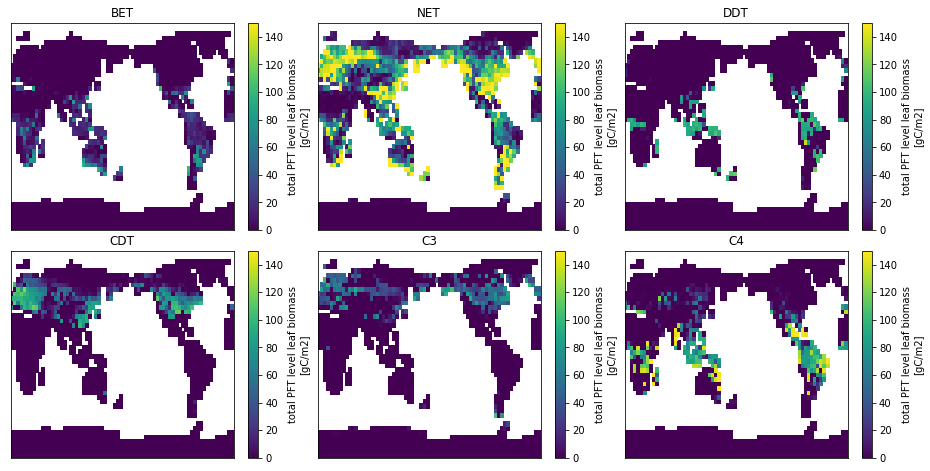

In [4]:
pftnames=['BET','NET','DDT','CDT','C3','C4']
print(pftnames)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]
#fig.suptitle('LAI', fontsize=16)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

scratch = '/glade/scratch/rfisher/'

yr='.clm2.h0.0009-06.nc'
runname='fates_pftboundaries'

    
run=runname+'00'
arc = scratch + 'archive/' + run + '/lnd/hist/'
f2=(arc +run+yr) 
print(f2)
import os.path
f=os.path.isfile(f2)
if(f):
  ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)
else:
  arc = scratch + run + '/run/'
  f2=(arc +run+yr)
  print(f2)
  ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)  
  ds6 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)  
pfts=range(1,7)
for pft1 in pfts:
   ax = fig.add_subplot(2, 3, pft1) 
   print((ds0.PFTleafbiomass.sizes))
   print(pft1)
  # print(ds0.PFTleafbiomass[pft1,:,:])
   plt1=ds0.PFTleafbiomass[0,pft1-1,:,:].plot()
   plt.title(pftnames[pft1-1]) 
   plt1.set_clim(0, 150)
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
   #ax.get_title().set_visible(False)

plt.savefig('../figs/6pfts.png')

['BET', 'NET', 'DDT', 'CDT', 'C3', 'C4']
/glade/scratch/rfisher/archive/fates_pftboundaries00/lnd/hist/fates_pftboundaries00.clm2.h0.0009-06.nc
/glade/scratch/rfisher/fates_pftboundaries00/run/fates_pftboundaries00.clm2.h0.0009-06.nc
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
1
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
2
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
3
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
4
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
5
Frozen(OrderedDict([('time', 1), ('fates_levpft', 6), ('lat', 46), ('lon', 72)]))
6


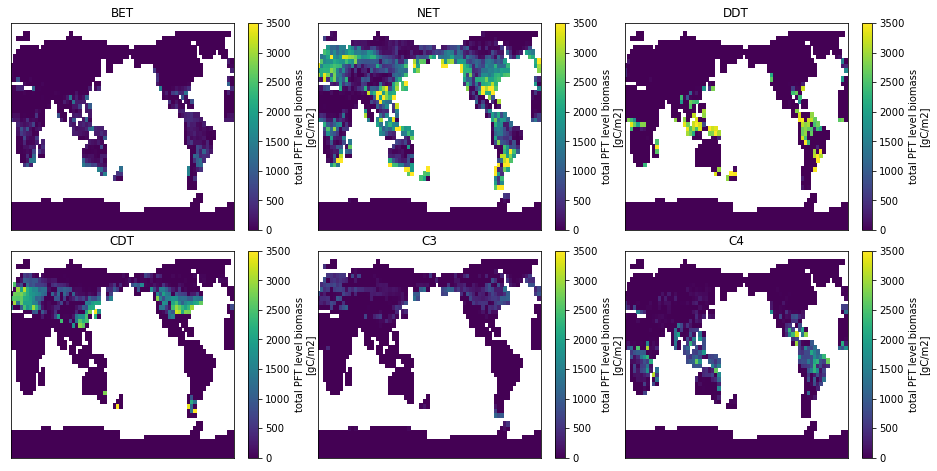

In [5]:
pftnames=['BET','NET','DDT','CDT','C3','C4']
print(pftnames)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [16, 8]
#fig.suptitle('LAI', fontsize=16)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

scratch = '/glade/scratch/rfisher/'

yr='.clm2.h0.0009-06.nc'
runname='fates_pftboundaries'

    
run=runname+'00'
arc = scratch + 'archive/' + run + '/lnd/hist/'
f2=(arc +run+yr) 
print(f2)
import os.path
f=os.path.isfile(f2)
if(f):
  ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)
else:
  arc = scratch + run + '/run/'
  f2=(arc +run+yr)
  print(f2)
  ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)  
pfts=range(1,7)
for pft1 in pfts:
   ax = fig.add_subplot(2, 3, pft1) 
   print((ds0.PFTbiomass.sizes))
   print(pft1)
  # print(ds0.PFTleafbiomass[pft1,:,:])
   plt1=ds0.PFTbiomass[0,pft1-1,:,:].plot()
   plt.title(pftnames[pft1-1]) 
   plt1.set_clim(0, 3500)
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
   #ax.get_title().set_visible(False)

plt.savefig('../figs/6pfts.png')

['BET', 'NET', 'DDT', 'CDT', 'C3', 'C4']
0
1
2
fates_pftboundaries21
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
3
fates_pftboundaries31
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
fates_pftboundaries32
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
4
fates_pftboundaries41
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
fates_pftboundaries42
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
fates_pftboundaries43
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
5
fates_pftboundaries51
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
fates_pftboundaries52
True
Frozen(OrderedDict([('time', 1), ('fates_levpft', 2), ('lat', 46), ('lon', 72)]))
fates_pftboundaries53
True
Frozen(OrderedDict([('time', 1), ('fates_levpft'

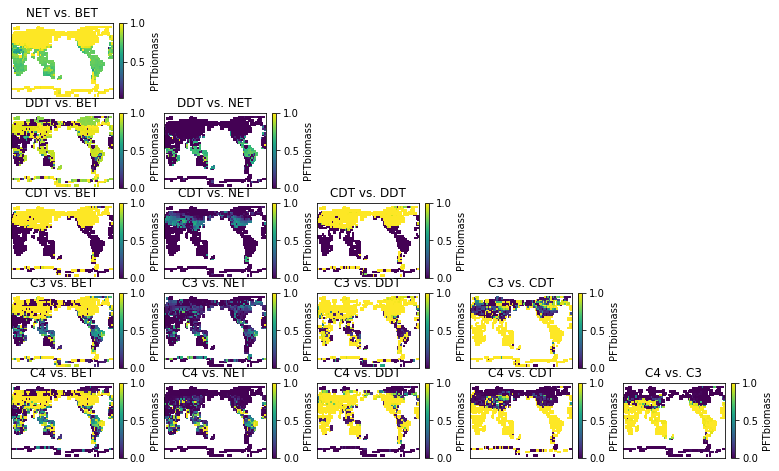

In [6]:
pftnames=['BET','NET','DDT','CDT','C3','C4']
print(pftnames)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [18, 12]
fig.subplots_adjust(hspace=0.2, wspace=0.2)

scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
yr='.clm2.h0.0009-06.nc'

count=1
pfts=range(0,7)
for pft1 in pfts:
   print(pft1)
   pft2=1
   while (pft2<pft1):     
    nplot = (pft1-2)*6+(pft2)
    ax = fig.add_subplot(5, 6, nplot)    
    run=runname+str(pft1)+str(pft2)
    print(run)
    arc = scratch + 'archive/' + run + '/lnd/hist/'
    f2=(arc +run+yr)  
    count = count+1
    import os.path
    f=os.path.isfile(f2)
    print(f)
    if(f):   
     ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)
    else:
     arc = scratch + run + '/run/'
     f2=(arc +run+yr)
     ds0 = xr.open_mfdataset([f2], drop_variables=drop, decode_times=False)    
    print(ds0.PFTleafbiomass.sizes)
    plt2=np.divide(ds0.PFTbiomass[0,0,:,:],(ds0.PFTbiomass[0,1,:,:]+ds0.PFTbiomass[0,0,:,:])).plot(vmax=1) 
    plt.title(pftnames[pft1-1]+' vs. '+pftnames[pft2-1])    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pft2 = pft2 + 1
    
plt.savefig('../figs/2pft_boundaries.png')

Frozen(OrderedDict([('time', 1), ('lat', 46), ('lon', 72)]))


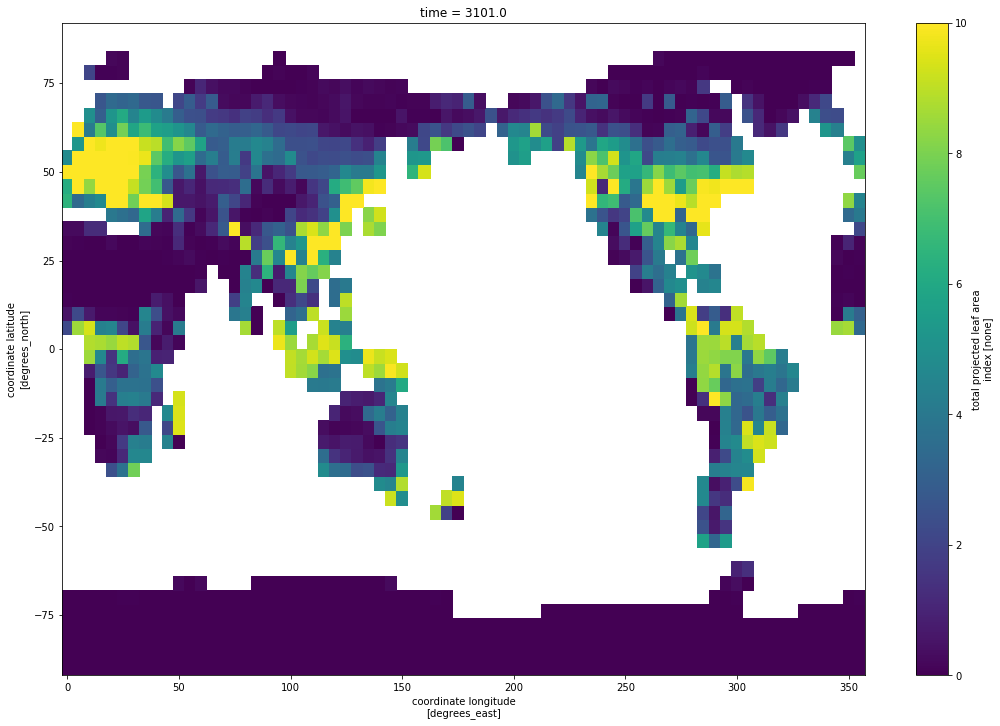

In [8]:
plt.clim=[0,2]
print(ds0.TLAI.sizes)
plt1=ds6.TLAI[:,:].plot(clim=[0,2])
plt1.set_clim(0, 10)
plt.savefig('tlai.png')

Then we plot a timeseries of the LAI of all global points

Frozen(OrderedDict([('time', 1), ('lat', 46), ('lon', 72)]))


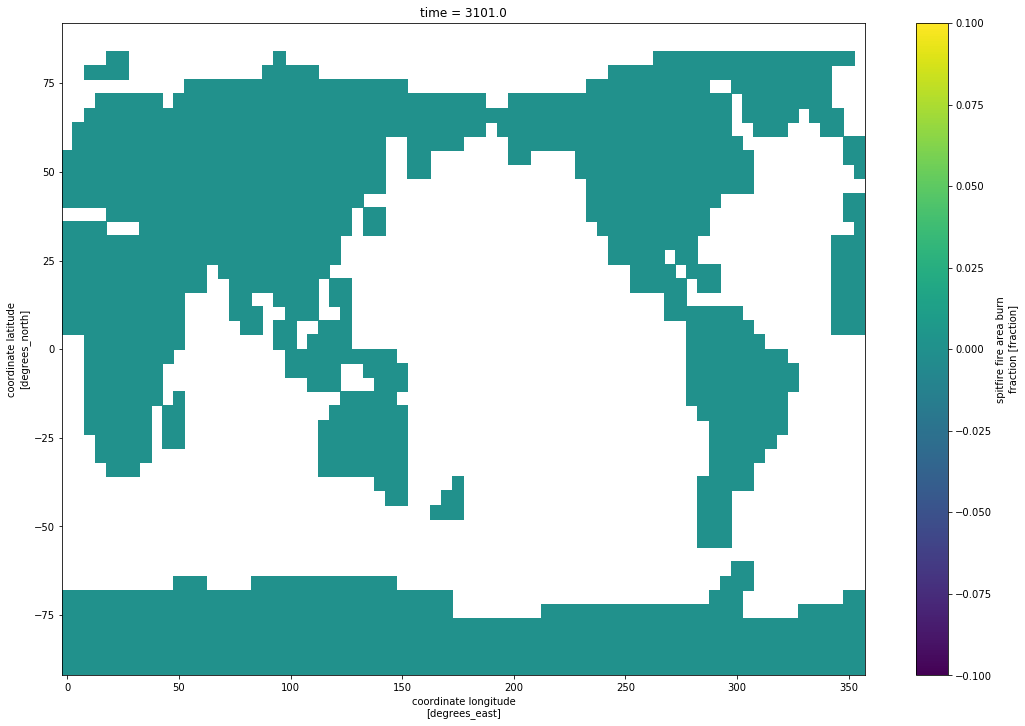

In [10]:
plt.clim=[0,2]
print(ds0.FIRE_AREA.sizes)
plt1=ds6.FIRE_AREA[:,:].plot(clim=[0,2])
plt.savefig('FIRE_AREA.png')